In [1]:
import random

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline

tf.enable_eager_execution()

s = open('test.jpg', 'rb').read()
img = tf.image.decode_jpeg(s)

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
height, width, _ = img.shape
height, width = height.value, width.value
print(height, width)

768 1024


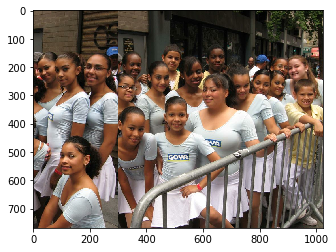

In [3]:
im = tf.reverse_sequence(img,
                         seq_lengths=[300] * height,
                         seq_axis=1, batch_axis=0)
plt.imshow(im)

res.shape (1, 2, 3, 750000)
big.shape (1, 1000, 1500, 3)


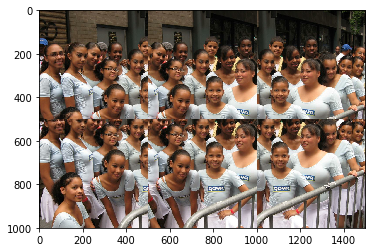

In [4]:
res = tf.extract_image_patches(
    tf.expand_dims(img, axis=0),
    ksizes=[1, 500, 500, 1],
    strides=[1, 200, 200, 1],
    rates=[1, 1, 1, 1],
    padding='VALID',
)
print('res.shape', res.shape)
big = tf.depth_to_space(res, block_size=500)
print('big.shape', big.shape)
plt.imshow(tf.squeeze(big))

In [5]:
x = np.random.random([1, 2, 3, 10])
print(x.shape)
x = tf.squeeze(x)
print(x.shape)
print(x)
y = tf.unstack(x, axis=1)
print(len(y))
y0 = y[0]
print(y0.shape)
print(y0)
z = tf.concat(y, axis=0)
print(z.shape)


(1, 2, 3, 10)
(2, 3, 10)
tf.Tensor(
[[[0.40945441 0.15939133 0.06109085 0.11972341 0.7927581  0.17068169
   0.13617105 0.71436023 0.935137   0.14588165]
  [0.6439927  0.90101701 0.76483886 0.53907353 0.14594197 0.36068359
   0.78230715 0.29883644 0.50300007 0.83140284]
  [0.78122289 0.9052796  0.20101347 0.20635966 0.73502666 0.12449139
   0.59816181 0.90842135 0.95809969 0.13755041]]

 [[0.90853925 0.63313182 0.15047834 0.81472143 0.35616023 0.54501561
   0.99184264 0.63952209 0.64625928 0.28386874]
  [0.5821993  0.31730086 0.93405643 0.21877557 0.26159987 0.34578503
   0.80426936 0.27551781 0.44477692 0.40682317]
  [0.90961745 0.22925433 0.81497315 0.26013811 0.1533068  0.28833016
   0.97087944 0.2831282  0.29358825 0.79049642]]], shape=(2, 3, 10), dtype=float64)
3
(2, 10)
tf.Tensor(
[[0.40945441 0.15939133 0.06109085 0.11972341 0.7927581  0.17068169
  0.13617105 0.71436023 0.935137   0.14588165]
 [0.90853925 0.63313182 0.15047834 0.81472143 0.35616023 0.54501561
  0.99184264 0.63952

In [11]:
res = tf.space_to_batch_nd(
    tf.expand_dims(img, 0),
    block_shape=[256, 256],
    paddings=[[0, 0], [0, 0]])
print(res.shape)


(65536, 3, 4, 3)


In [7]:
img2 = tf.depth_to_space(
    tf.space_to_depth(
        tf.expand_dims(img, axis=0),
        block_size=128),
    block_size=128)
print(img2.shape)
print(np.array_equal(tf.squeeze(img2).numpy(), img.numpy()))
    

(1, 768, 1024, 3)
True
